In [3]:
# Import necessary libraries
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Display a message indicating successful import
"All necessary libraries have been imported."


'All necessary libraries have been imported.'

In [6]:
# Reload the Market Basket dataset
market_basket_file = "Day 30 Market_Basket_Data.csv"
df_market = pd.read_csv(market_basket_file)

# Display the first five rows
df_market.head()


,Transaction_ID,Items
0,1,"Pasta, Milk, Eggs"
1,2,"Carrots, Bananas, Tomato Sauce"
2,3,"Tomato Sauce, Carrots, Cheese"
3,4,"Butter, Rice, Potatoes"
4,5,"Tea, Apples, Pasta, Orange Juice, Bread, Eggs"


In [7]:
# Split items in each transaction and count occurrences
all_items = df_market["Items"].str.split(", ").explode()
item_counts = Counter(all_items)

# Convert to DataFrame for better visualization
item_counts_df = pd.DataFrame(item_counts.items(), columns=["Item", "Count"]).sort_values(by="Count", ascending=False)

# Display the top 10 most frequently purchased items
item_counts_df.head(10)


,Item,Count
6,Cheese,26
10,Tea,25
19,Coffee,25
2,Eggs,24
18,Yogurt,24
0,Pasta,23
7,Butter,23
14,Cereal,21
5,Tomato Sauce,21
1,Milk,20


<ipython-input-8-b28d678df5a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts_df["Item"][:10], y=item_counts_df["Count"][:10], palette="viridis")


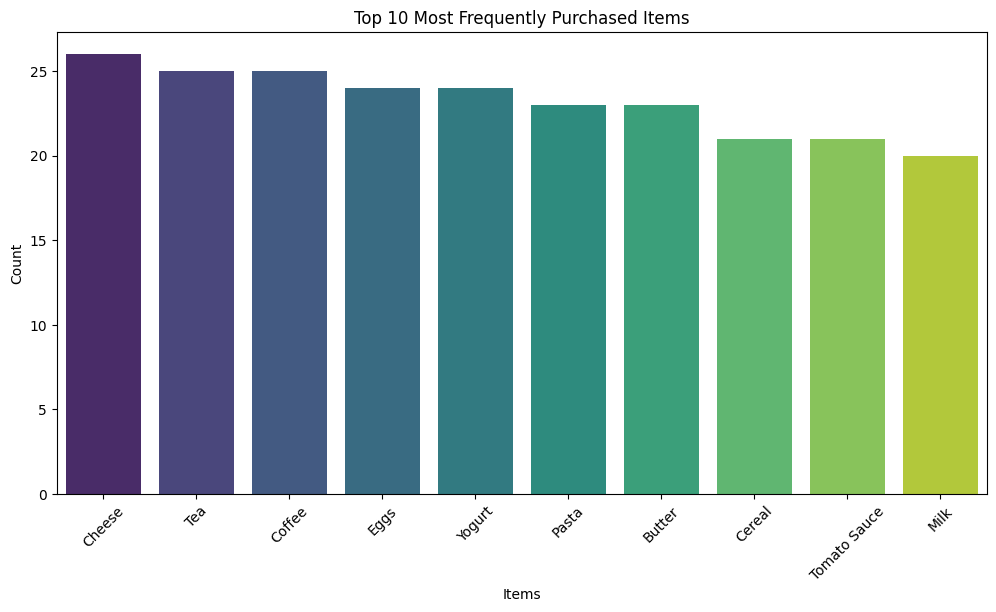

In [8]:
# Plot the top 10 most frequently purchased items
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts_df["Item"][:10], y=item_counts_df["Count"][:10], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Items")
plt.ylabel("Count")
plt.title("Top 10 Most Frequently Purchased Items")
plt.show()


In [9]:
# Convert transaction data into a list of lists
transactions = df_market["Items"].str.split(", ")

# Create a unique list of all items
unique_items = sorted(set(itertools.chain.from_iterable(transactions)))

# Convert transactions into a binary format suitable for Apriori
df_encoded = pd.DataFrame([[1 if item in transaction else 0 for item in unique_items] for transaction in transactions],
                          columns=unique_items)

# Display the first five rows of the encoded transaction data
df_encoded.head()


,Apples,Bananas,Bread,Butter,Carrots,Cereal,Cheese,Chicken,Coffee,Eggs,Milk,Onions,Orange Juice,Pasta,Potatoes,Rice,Sugar,Tea,Tomato Sauce,Yogurt
0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0


In [10]:
# Since mlxtend is not available, let's check if we can manually compute frequent itemsets
# Count itemset occurrences
from itertools import combinations

# Define minimum support threshold
min_support = 0.1 * len(transactions)  # 10% of total transactions

# Generate item combinations and count occurrences
itemsets_counts = Counter()
for transaction in transactions:
    for r in range(1, 3):  # Generate itemsets of size 1 and 2
        for itemset in combinations(transaction, r):
            itemsets_counts[itemset] += 1

# Filter itemsets based on minimum support
frequent_itemsets = {itemset: count for itemset, count in itemsets_counts.items() if count >= min_support}

# Convert to DataFrame for better visualization
frequent_itemsets_df = pd.DataFrame(frequent_itemsets.items(), columns=["Itemset", "Support"]).sort_values(by="Support", ascending=False)

# Display top frequent itemsets
frequent_itemsets_df.head(10)


,Itemset,Support
6,"(Cheese,)",26
10,"(Tea,)",25
19,"(Coffee,)",25
2,"(Eggs,)",24
18,"(Yogurt,)",24
0,"(Pasta,)",23
7,"(Butter,)",23
14,"(Cereal,)",21
5,"(Tomato Sauce,)",21
1,"(Milk,)",20


In [11]:
# Generate association rules manually based on confidence and lift
rules = []
total_transactions = len(transactions)

for itemset, support in frequent_itemsets.items():
    if len(itemset) > 1:  # Only consider itemsets with at least two items
        for item in itemset:
            antecedent = (item,)
            consequent = tuple(set(itemset) - set(antecedent))

            # Compute confidence: P(consequent | antecedent) = support(itemset) / support(antecedent)
            antecedent_support = frequent_itemsets.get(antecedent, 0)
            confidence = support / antecedent_support if antecedent_support else 0

            # Compute lift: confidence / P(consequent)
            consequent_support = frequent_itemsets.get(consequent, 0) / total_transactions
            lift = confidence / consequent_support if consequent_support else 0

            # Store the rule if confidence is above threshold (0.5)
            if confidence >= 0.5:
                rules.append((antecedent, consequent, confidence, lift))

# Convert rules to DataFrame and sort by confidence
rules_df = pd.DataFrame(rules, columns=["Antecedent", "Consequent", "Confidence", "Lift"]).sort_values(by="Confidence", ascending=False)

# Display top 5 association rules
rules_df.head(5)


,Antecedent,Consequent,Confidence,Lift
